Mapping of STEM courses to our sectors

In [42]:
# imports 
import pandas as pd
import numpy as np
import os 

from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

import networkx as nx
import matplotlib.pyplot as plt

import seaborn as sns
import textwrap


Define path to our sallary_per_sector.csv and read it into a pandas dataframe

In [43]:
current_directory = %pwd
PROJECT_DIR = os.path.dirname(current_directory)
DATA_DIR = os.path.join(PROJECT_DIR, "dat")
SALARY_PATH = os.path.join(DATA_DIR, "sallary_per_sector.csv")

file_path = SALARY_PATH
data = pd.read_csv(file_path, encoding= "ISO-8859-1",sep=";", decimal=".", skiprows=5, skipfooter=9, index_col=0, engine="python")

Create a new DataFrame with only the value from the column 'sector' 

In [44]:
# Get the list of columns in the DataFrame
columns_list = data.columns.tolist()

# Let's say you want to rename the column at index 2
columns_list[0] = 'sector'
columns_list[1] = 'year'
columns_list[2] = 'quarter'
columns_list[3] = 'salary'
columns_list[6] = 'salary'

# Assign the modified list of column names back to the DataFrame
data.columns = columns_list


# Create a new DataFrame with only the value from the column 'sector' 
filtered_data = data['sector'].tolist()

# Delete duplicates
unique_list = list(set(filtered_data))

# Filter out NaN values
sector_list = [x for x in unique_list if not pd.isna(x)]

Show length of new dataframe (number of different sectors in our economy) and show the first 5 sectors

In [45]:
print(len(sector_list))

# Print the first five elements
print(sector_list[:5])

209
['Tabakverarbeitung', 'Eh.m. Waren verschiedener Art (in Verkaufsräumen)', 'Heime (ohne Erholungs- und Ferienheime)', 'Gewinnung von Steinen und Erden, sonstiger Bergbau', 'Herstellung von Kraftwagen und Kraftwagenteilen']


If needed, save list as pdf file

In [46]:
# Create a PDF file
c = canvas.Canvas("sector_list_with_index.pdf", pagesize=letter)
c.drawString(100, 750, "Indexed Sector List:")

# Start the Y coordinate for the first item
y = 730
# Height of the page minus bottom margin
page_height = letter[1] - 72

# Loop through the list and add each item to the PDF with an index
for index, item in enumerate(sector_list, start=1):  # start=1 begins indexing from 1
    c.drawString(100, y, f"{index}. {item}")
    y -= 20  # Decrease Y coordinate to move down the page
    if y < 72:  # Less than the bottom margin
        # Add a new page and reset the Y coordinate
        c.showPage()
        c.drawString(100, page_height, "Indexed Sector List (continued):")
        y = page_height - 20

# Save the PDF file
#c.save()

Visualize the mapping using bipartite graph and save it as pdf.

In [47]:
# Create a new graph
B = nx.Graph()

# Add nodes for STEM classes
stem_classes = [
    'Biology', 'Chemistry', 'Geosciences', 'Computer Science', 
    'Mathematics', 'Pharmacy and Biochemistry', 'Physics', 'Psychology'
]

B.add_nodes_from(stem_classes, bipartite=0)

# Add nodes for relevant sectors and corresponding mappings
sectors_mapping = {
    'Biology': [182, 127],
    'Chemistry': [1, 182],
    'Geosciences': [16, 13],
    'Computer Science': [50, 206],
    'Mathematics': [56, 50],
    'Pharmacy and Biochemistry': [182, 1],
    'Physics': [55],
    'Psychology': [109, 202]
}

# Flattening the list of sectors and removing duplicates
all_sectors = list(set([sector for sector_list in sectors_mapping.values() for sector in sector_list]))
B.add_nodes_from(all_sectors, bipartite=1)

# Add edges based on the mappings
for stem_class, sector_list in sectors_mapping.items():
    for sector in sector_list:
        B.add_edge(stem_class, sector)

# Determine the positions for nodes
pos = {node: [0, i] for i, node in enumerate(stem_classes)}
pos.update({node: [1, i] for i, node in enumerate(all_sectors)})

# Create a new figure with a defined size
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the size as needed

# Draw the graph without labels first
nx.draw(B, pos, with_labels=False, node_color='lightblue', edge_color='gray', ax=ax)

# Define a function to wrap text labels
def wrap_labels(labels, wrap_width):
    return {k: textwrap.fill(v, width=wrap_width) for k, v in labels.items()}

# Wrap class labels and sector labels differently if needed
class_labels = wrap_labels({node: node for node in stem_classes}, wrap_width=15)
sector_labels = wrap_labels({node: str(node) for node in all_sectors}, wrap_width=10)

# Draw custom labels
for label, (x, y) in pos.items():
    if label in class_labels:
        ax.text(x, y, class_labels[label], 
                 horizontalalignment='right' if x == 0 else 'left',
                 verticalalignment='center', fontsize=6)
    else:
        ax.text(x, y, sector_labels[label], 
                 horizontalalignment='right' if x == 0 else 'left',
                 verticalalignment='center', fontsize=8)

# Adjust the plot area to prevent the cutting off of labels
plt.subplots_adjust(left=0.2, right=0.8, top=0.95, bottom=0.05)  # Adjust these values as needed

# Set title
ax.set_title("STEM Classes and Relevant Sectors Mapping")

# Define the directory path
directory_path = os.path.join(PROJECT_DIR,'doc/DataLiteracyStudentProject/fig')

# Define the path where you want to save the figure
figure_path = os.path.join(directory_path, 'STEMFieldsToSectorBipartiteGraph.pdf')

# Save the figure
fig.savefig(figure_path, format='pdf', bbox_inches='tight')
# Show or save the plot
plt.show()
# Clear the figure to avoid overlap with future plots
plt.clf()


<Figure size 800x600 with 0 Axes>

Visualize the mapping using heatmap and save it as pdf.

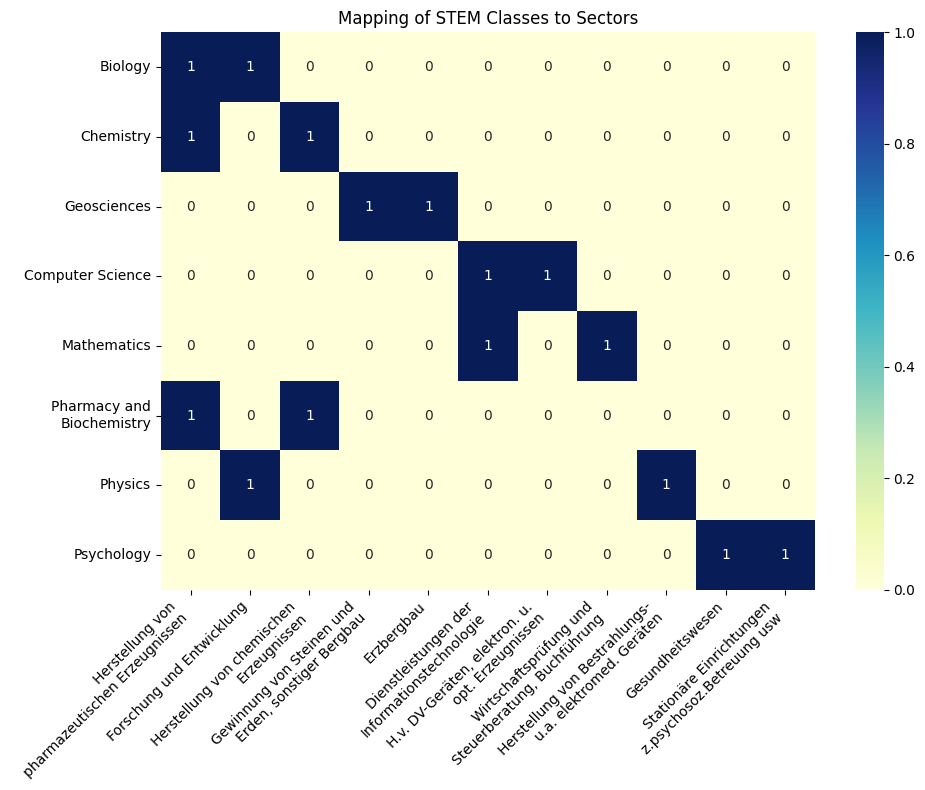

<Figure size 640x480 with 0 Axes>

In [49]:

def wrap_labels(labels, width=30):
    return [textwrap.fill(label, width=width) for label in labels]


# Wrap the sector names for readability
sector_names = [
    'Herstellung von pharmazeutischen Erzeugnissen', 
    'Forschung und Entwicklung', 
    'Herstellung von chemischen Erzeugnissen', 
    'Gewinnung von Steinen und Erden, sonstiger Bergbau', 
    'Erzbergbau', 
    'Dienstleistungen der Informationstechnologie', 
    'H.v. DV-Geräten, elektron. u. opt. Erzeugnissen', 
    'Wirtschaftsprüfung und Steuerberatung, Buchführung', 
    'Herstellung von Bestrahlungs- u.a. elektromed. Geräten', 
    'Gesundheitswesen', 
    'Stationäre Einrichtungen z.psychosoz.Betreuung usw'
]

# Wrap the sector names for readability
wrapped_sector_names = wrap_labels(sector_names)

# Map the original sector names to the wrapped names
name_mapping = dict(zip(sector_names, wrapped_sector_names))

# Initialize the data with zeros using the wrapped labels
data = {wrapped_name: [0, 0, 0, 0, 0, 0, 0, 0] for wrapped_name in wrapped_sector_names}

# Update the data to reflect the associations
# Biology
data[name_mapping['Herstellung von pharmazeutischen Erzeugnissen']][0] = 1  
data[name_mapping['Forschung und Entwicklung']][0] = 1  

# Chemistry
data[name_mapping['Herstellung von chemischen Erzeugnissen']][1] = 1  
data[name_mapping['Herstellung von pharmazeutischen Erzeugnissen']][1] = 1  

# Geosciences
data[name_mapping['Gewinnung von Steinen und Erden, sonstiger Bergbau']][2] = 1  
data[name_mapping['Erzbergbau']][2] = 1  

# Computer Science
data[name_mapping['Dienstleistungen der Informationstechnologie']][3] = 1  
data[name_mapping['H.v. DV-Geräten, elektron. u. opt. Erzeugnissen']][3] = 1  

# Mathematics
data[name_mapping['Dienstleistungen der Informationstechnologie']][4] = 1  
data[name_mapping['Wirtschaftsprüfung und Steuerberatung, Buchführung']][4] = 1  

# Pharmacy and Biochemistry
data[name_mapping['Herstellung von chemischen Erzeugnissen']][5] = 1  
data[name_mapping['Herstellung von pharmazeutischen Erzeugnissen']][5] = 1  

# Physics
data[name_mapping['Forschung und Entwicklung']][6] = 1  
data[name_mapping['Herstellung von Bestrahlungs- u.a. elektromed. Geräten']][6] = 1  

# Psychology
data[name_mapping['Gesundheitswesen']][7] = 1  
data[name_mapping['Stationäre Einrichtungen z.psychosoz.Betreuung usw']][7] = 1  

# Create the DataFrame using wrapped labels for columns
df = pd.DataFrame(data, index=[
    'Biology', 'Chemistry', 'Geosciences', 'Computer Science', 
    'Mathematics', 'Pharmacy and Biochemistry', 'Physics', 'Psychology'
])

# Wrap each index label
wrapped_labels = [textwrap.fill(label, width=20) for label in df.index]

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap="YlGnBu")

# Set the wrapped labels as the y-tick labels
plt.yticks(plt.yticks()[0], wrapped_labels, va="center", rotation=0, fontsize=10)
# Adjust the labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Customize further as needed
plt.title('Mapping of STEM Classes to Sectors')
# Make sure the labels are not cut off
plt.tight_layout()

# Define the directory path
directory_path = os.path.join(PROJECT_DIR,'doc/DataLiteracyStudentProject/fig')

# Define the path where you want to save the figure
figure_path = os.path.join(directory_path, 'STEMFieldsToSectorHeatMap.pdf')

# Save the figure before showing it
plt.savefig(figure_path, format='pdf', bbox_inches='tight')
# Show or save the plot
plt.show()
# Clear the figure to avoid overlap with future plots
plt.clf()